# Análisis Exploratorio de Datos (EDA) – Spotify

1. Carga del dataset limpio `spotify_clean.csv`.
2. Estadísticas descriptivas y visualizaciones.
3. Comparación hit vs no hit.
4. Correlaciones entre variables.
5. Análisis por género musical.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display
import plotly.express as px
import json 
# Mostrar todas las columnas
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 2000)

### Carga de los datos

In [27]:
# Ruta al archivo fuente inicial 
DATA_PATH = "../data/processed/spotify_clean.csv"

# Verificar existencia
if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"No se encontró el archivo en {DATA_PATH}")

# Carga el archivo CSV
df = pd.read_csv(DATA_PATH)
print(f"Dataset se ha cargado correctamente en un arreglo: {df.shape}")

# Información estadística básica
print("\nInformación estadística básica:\n") 
#df.head()
print("Info-------------------")
df.info()

Dataset se ha cargado correctamente en un arreglo: (232724, 19)

Información estadística básica:

Info-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232724 entries, 0 to 232723
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232724 non-null  object 
 1   artist_name       232724 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232724 non-null  object 
 4   popularity        232724 non-null  int64  
 5   acousticness      232724 non-null  float64
 6   danceability      232724 non-null  float64
 7   duration_ms       232724 non-null  int64  
 8   energy            232724 non-null  float64
 9   instrumentalness  232724 non-null  float64
 10  key               232724 non-null  object 
 11  liveness          232724 non-null  float64
 12  loudness          232724 non-null  float64
 13  mode              232724 non-null  int64  

## Definen y eliminan Columnas no necesarias

In [28]:
# Se eliminan las columnas artist_name, track_name, track_id y key
df = df.drop(columns=["artist_name", "track_name", "track_id", "key", "mode", "time_signature"], errors="ignore")


## Estadísticas descriptivas y visualizaciones

In [29]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
popularity,232724.0,41.13,18.19,0.00,29.00,43.00,55.00,100.00
acousticness,232724.0,0.37,0.35,0.00,0.04,0.23,0.72,1.00
danceability,232724.0,0.55,0.19,0.06,0.44,0.57,0.69,0.99
duration_ms,232724.0,235121.85,118935.93,15387.00,182856.25,220427.00,265768.00,5552917.00
energy,232724.0,0.57,0.26,0.00,0.38,0.60,0.79,1.00
instrumentalness,232724.0,0.15,0.30,0.00,0.00,0.00,0.04,1.00
liveness,232724.0,0.22,0.20,0.01,0.10,0.13,0.26,1.00
loudness,232724.0,-9.57,6.00,-52.46,-11.77,-7.76,-5.50,3.74
speechiness,232724.0,0.12,0.19,0.02,0.04,0.05,0.10,0.97
tempo,232724.0,117.67,30.90,30.38,92.96,115.78,139.05,242.90


### Crea la distribucion de la zona hit musical Percentil 95

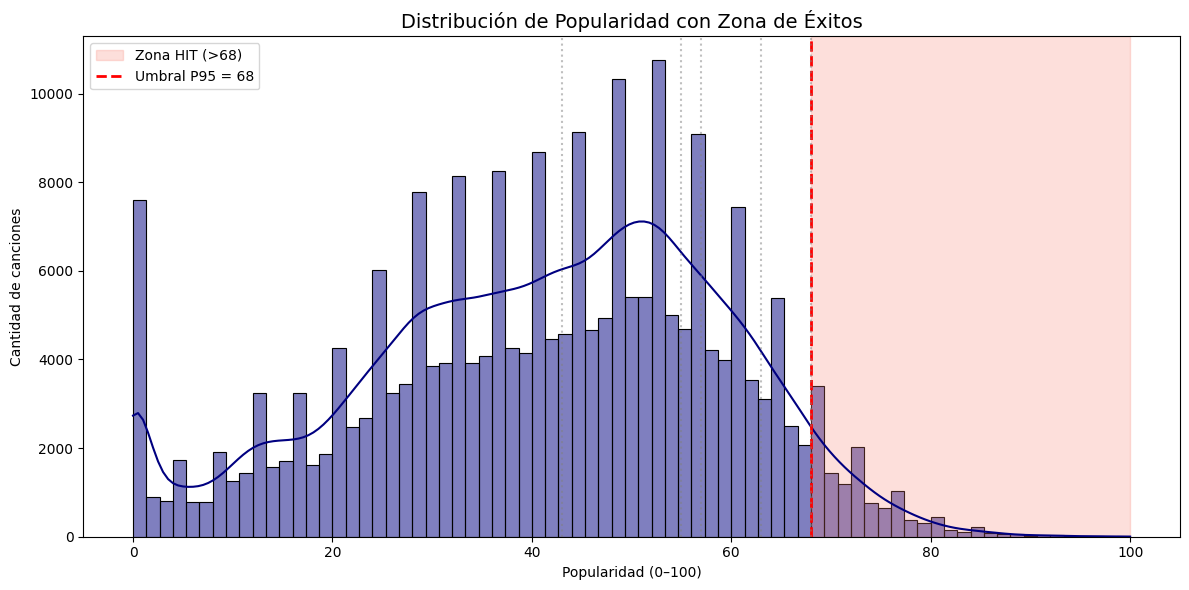

🎯 Umbral establecido en el percentil 95 → Popularidad > 68
✅ Canciones clasificadas como HIT: 10544 de 232724 (4.53%)


In [30]:
# Resumen estadístico
# --- Configuración del percentil de umbral ---
percentil_hit = 0.95  
umbral = df["popularity"].quantile(percentil_hit)

# --- Crear el histograma ---
plt.figure(figsize=(12,6))
sns.histplot(df["popularity"], bins=75, kde=True, color="navy", edgecolor="black")

# --- Rellenar la zona de los hits ---
plt.axvspan(umbral, df["popularity"].max(), color="salmon", alpha=0.25, label=f"Zona HIT (>{umbral:.0f})")

# --- Dibujar línea de umbral ---
plt.axvline(umbral, color="red", linestyle="--", linewidth=2, label=f"Umbral P{int(percentil_hit*100)} = {umbral:.0f}")

# --- Opcional: añadir otras líneas de percentiles ---
for p in [0.5, 0.75, 0.8, 0.9, 0.95]:
    plt.axvline(df["popularity"].quantile(p), color="gray", linestyle=":", alpha=0.5)

# --- Estética ---
plt.title("Distribución de Popularidad con Zona de Éxitos", fontsize=14)
plt.xlabel("Popularidad (0–100)")
plt.ylabel("Cantidad de canciones")
plt.legend()
plt.tight_layout()
plt.show()

# --- Crear la variable objetivo basada en ese umbral ---
df["is_hit"] = (df["popularity"] > umbral).astype(int)

print(f"🎯 Umbral establecido en el percentil {int(percentil_hit*100)} → Popularidad > {umbral:.0f}")
print(f"✅ Canciones clasificadas como HIT: {df['is_hit'].sum()} de {len(df)} ({df['is_hit'].mean()*100:.2f}%)")


## Correlaciones entre variables

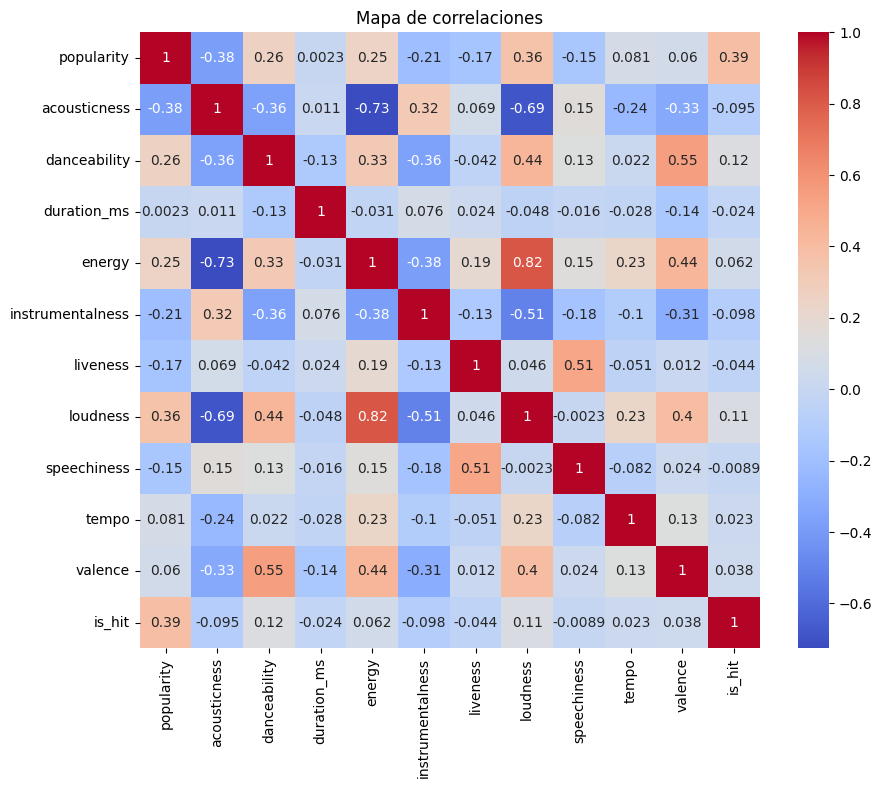

In [41]:
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title("Mapa de correlaciones")
plt.show()


### Correlacion Directa

In [32]:
# Correlación directa con popularidad o is_hit
corr["is_hit"].sort_values(ascending=False)

is_hit              1.000000
popularity          0.391859
danceability        0.121247
loudness            0.108466
energy              0.061671
valence             0.037736
tempo               0.022765
speechiness        -0.008862
duration_ms        -0.023957
liveness           -0.043567
acousticness       -0.094851
instrumentalness   -0.097980
Name: is_hit, dtype: float64

### Correlaciones Importantes

In [33]:
# Establece la mayor afinidad de las varianles numericas con la columna hit. 
# se orden en valor descendente para tomas las mas relacionadas con `is_hit``
corr = df.corr(numeric_only=True)["is_hit"].sort_values(ascending=False)
display(corr.round(3))


is_hit              1.000
popularity          0.392
danceability        0.121
loudness            0.108
energy              0.062
valence             0.038
tempo               0.023
speechiness        -0.009
duration_ms        -0.024
liveness           -0.044
acousticness       -0.095
instrumentalness   -0.098
Name: is_hit, dtype: float64

### Selecion de variables:
Las varibbles seleccionada son: danceability, loudness, energy, valence

## Comparación hit vs no hit

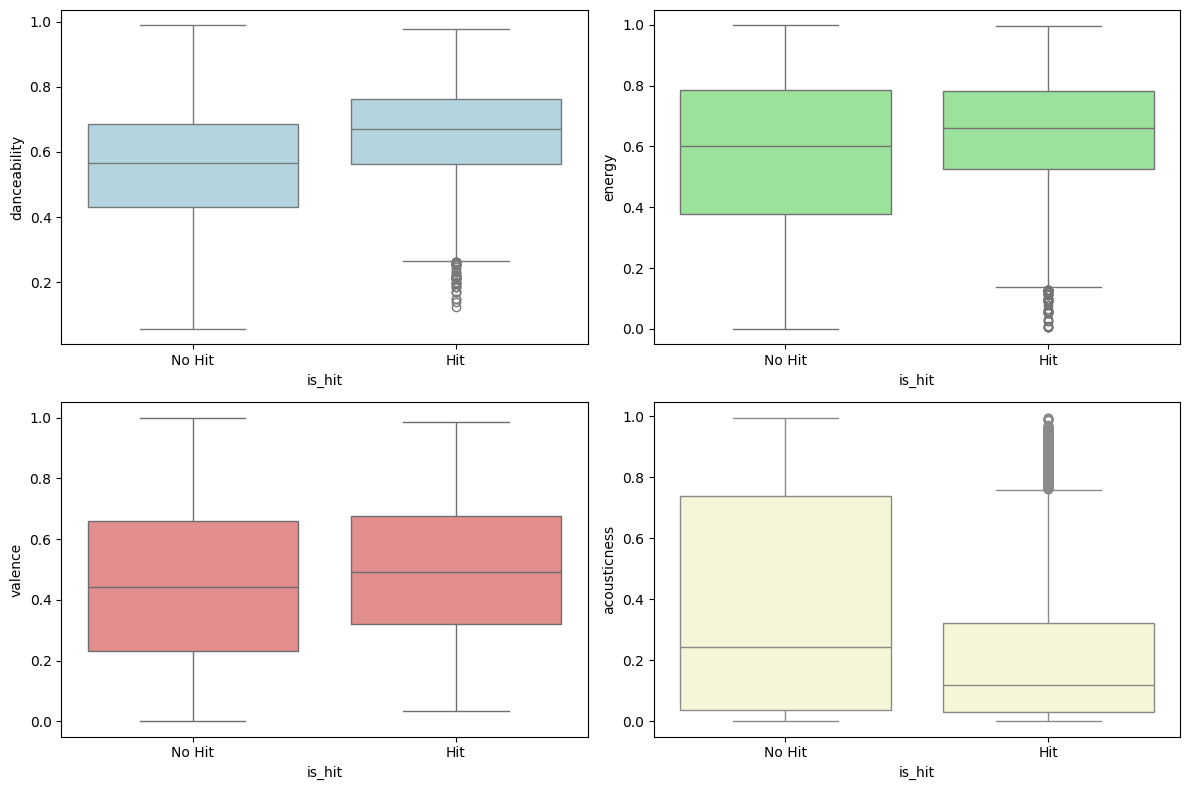

In [34]:
# Promedios por grupo
df_graph = df[["is_hit", "danceability", "energy", "valence", "acousticness"]].copy()
df_graph["is_hit"] = df_graph["is_hit"].replace({1: "Hit", 0: "No Hit"})


# Boxplots comparativos
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="is_hit", y="danceability", data=df_graph, ax=axes[0,0],color="lightblue")
sns.boxplot(x="is_hit", y="energy", data=df_graph, ax=axes[0,1],color="lightgreen")
sns.boxplot(x="is_hit", y="valence", data=df_graph, ax=axes[1,0],color="lightcoral")
sns.boxplot(x="is_hit", y="acousticness", data=df_graph, ax=axes[1,1],color="lightgoldenrodyellow")
plt.tight_layout()
plt.show()



## Análisis por Genero Musical

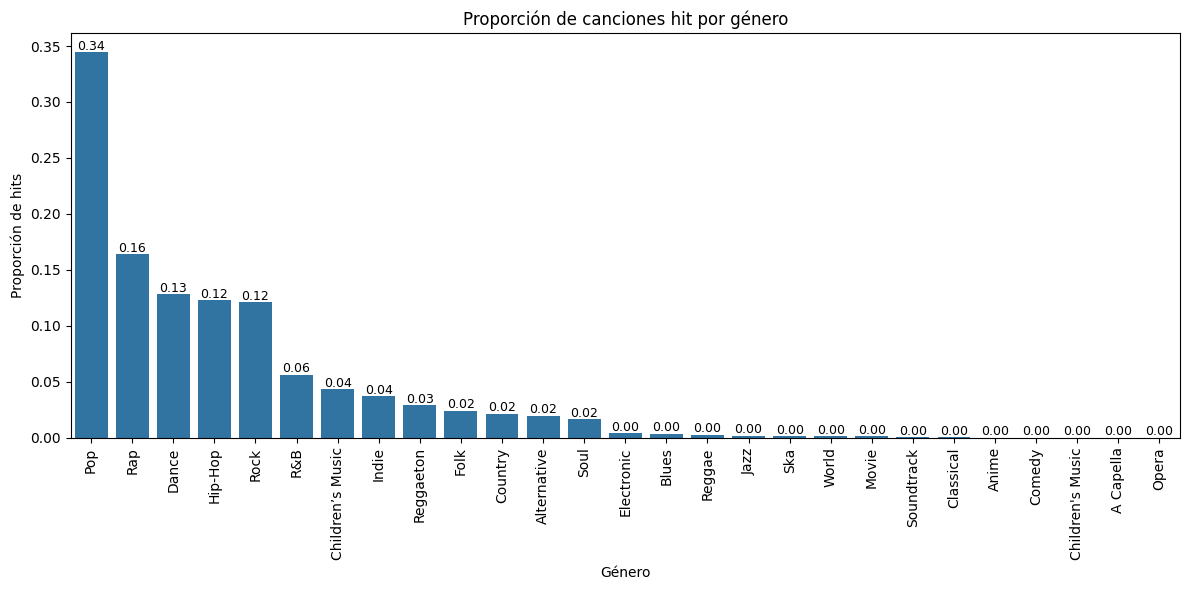

In [35]:
# Porcentaje de hits por género
genre_hit = df.groupby("genre")["is_hit"].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
ax = sns.barplot(x=genre_hit.index, y=genre_hit.values)  

# Mostrar el valor encima de cada barra
for i, v in enumerate(genre_hit.values):
    ax.text(i, v + 0.002, f"{v:.2f}", ha='center', fontsize=9)

plt.xticks(rotation=90)
plt.title("Proporción de canciones hit por género")
plt.ylabel("Proporción de hits")
plt.xlabel("Género")
plt.tight_layout()
plt.show()


## Hit por genero

In [36]:
hits_por_genero = df[df["is_hit"] == 1].groupby("genre")["is_hit"].count().reset_index()
hits_por_genero = hits_por_genero.rename(columns={"is_hit": "num_hits"})

# Ordenar de mayor a menor
hits_por_genero = hits_por_genero.sort_values("num_hits", ascending=False)

# Gráfico de barras
fig = px.bar(
    hits_por_genero,
    x="genre",
    y="num_hits",
    title="Número de Hits por Género",
    labels={"genre": "Género", "num_hits": "Cantidad de Hits"},
    color="num_hits",
    color_continuous_scale="Viridis"
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [37]:
hits_por_genero = (
    df[df["is_hit"] == 1]
    .groupby("genre")["is_hit"]
    .count()
    .reset_index()
    .rename(columns={"is_hit": "num_hits"})
    .sort_values("num_hits", ascending=False)
)

# Mostrar tabla
display(hits_por_genero)

,genre,num_hits
12,Pop,3234
14,Rap,1514
8,Hip-Hop,1140
17,Rock,1123
5,Dance,1117
13,R&B,506
2,Children’s Music,408
9,Indie,353
16,Reggaeton,257
7,Folk,225


## Creacion Del Dataset Final para el Modelo ML

In [38]:
## Creación del Data Set para el Modelo
os.makedirs("../data/processed", exist_ok=True)
df.to_csv("../data/processed/spotify_clean_modeling.csv", index=False)
print("💾 Archivo guardado en: ../data/processed/spotify_clean_modeling.csv")

💾 Archivo guardado en: ../data/processed/spotify_clean_modeling.csv


## Seleccion de hits para probar en API

### Toma de los datos

In [39]:
hits_test = df[
    df["popularity"].isin([95, 87]) &
    df["genre"].isin(["Pop", "Rock"])
].sample(5, random_state=42)

display(hits_test)


,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,is_hit
166057,Rock,95,0.19300,0.579,190947,0.904,0.000000,0.064,-2.729,0.0618,82.014,0.681,1
107947,Pop,87,0.00579,0.588,182075,0.821,0.000275,0.208,-6.540,0.2160,188.098,0.509,1
107892,Pop,87,0.05910,0.710,225987,0.888,0.000000,0.134,-6.457,0.2350,170.193,0.816,1
108095,Pop,87,0.01040,0.588,238173,0.670,0.000003,0.338,-6.439,0.0473,118.159,0.505,1
107854,Pop,87,0.02110,0.568,198160,0.656,0.000014,0.213,-5.413,0.0433,100.049,0.364,1


### Creacion del Json

In [40]:
cols = [
    "genre",
    "acousticness",
    "danceability",
    "energy",
    "instrumentalness",
    "liveness",
    "loudness",
    "speechiness",
    "tempo",
    "valence",
    "duration_ms"
]

hits_api = hits_test[cols]

json_test = hits_api.to_dict(orient="records")
print(json.dumps(json_test, indent=2))



[
  {
    "genre": "Rock",
    "acousticness": 0.193,
    "danceability": 0.579,
    "energy": 0.904,
    "instrumentalness": 0.0,
    "liveness": 0.064,
    "loudness": -2.729,
    "speechiness": 0.0618,
    "tempo": 82.014,
    "valence": 0.681,
    "duration_ms": 190947
  },
  {
    "genre": "Pop",
    "acousticness": 0.00579,
    "danceability": 0.588,
    "energy": 0.821,
    "instrumentalness": 0.000275,
    "liveness": 0.208,
    "loudness": -6.54,
    "speechiness": 0.216,
    "tempo": 188.098,
    "valence": 0.509,
    "duration_ms": 182075
  },
  {
    "genre": "Pop",
    "acousticness": 0.0591,
    "danceability": 0.71,
    "energy": 0.888,
    "instrumentalness": 0.0,
    "liveness": 0.134,
    "loudness": -6.457,
    "speechiness": 0.235,
    "tempo": 170.193,
    "valence": 0.816,
    "duration_ms": 225987
  },
  {
    "genre": "Pop",
    "acousticness": 0.0104,
    "danceability": 0.588,
    "energy": 0.67,
    "instrumentalness": 3.33e-06,
    "liveness": 0.338,
    "lo